In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import sys
# import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
%matplotlib inline


In [ ]:
# %pylab # 查看你的matplotlib后端
# %matplotlib qt5 激活方式为在绘图之前插入这个代码段

## 颜色参数 

参数|对应的颜色
:---:|:---:
b|蓝色
g|绿色
r|红色
c|青色
m|品红色
y|黄色
k|黑色
w|白色

# 创造面板

生成子图（subplot）的时候，必然带着所谓的一套轴域（Axes）。而用轴域（Axes）方法，客观上就是生成了一个可以画图的子图。  
add_subplot()方法在生成子图过程，简单明了，而用add_axes()方法,则生成子图的灵活性更强，完全可以实现add_subplot()方法的功能，可以控制子图显示位置，甚至实现相互重叠的效果

## 单面板图形

[(-2, 8),
 Text(0, 0.5, 'Y Axis'),
 (0.5, 4.5),
 Text(0.5, 0, 'X Axis'),
 Text(0.5, 1.0, 'an example axes')]

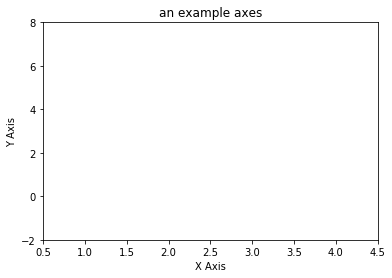

In [2]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.set(xlim=[0.5,4.5],ylim=[-2,8],title="an example axes",ylabel="Y Axis",xlabel="X Axis")

[(-2, 8),
 Text(0, 0.5, 'Y Axis'),
 (0.5, 4.5),
 Text(0.5, 0, 'X Axis'),
 Text(0.5, 1.0, 'an example axes')]

(0.2, 0.8)

Text(0.5, 1.0, 'a2')

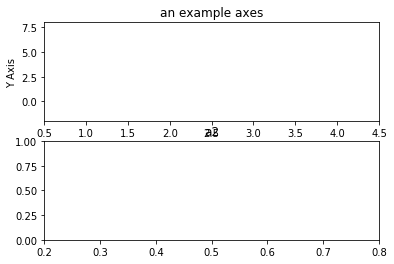

In [4]:
fig = plt.figure()
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
ax1.set(xlim=[0.5,4.5],ylim=[-2,8],title="an example axes",ylabel="Y Axis",xlabel="X Axis")
ax2.set_xlim(0.2,0.8)
ax2.set_title("a2")

## 多面板图形

##### 在其他子图中显示子图
把图表放入框架，在其他图表中显示。既然我们在说框架，也就是Axes对象，那么我们就需要把主Axes对象（也就是说主图表）跟防止另一个Axes对象实例的框架分开。用figure( )函数取到Figure对象，用add_axes( )函数在它上面定义两个Axes对象  

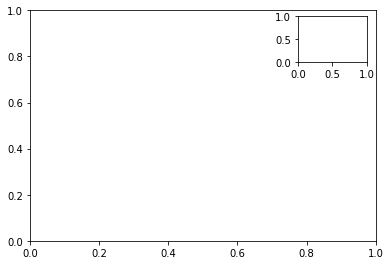

In [4]:
fig = plt.figure()
ax1=fig.add_axes([0.1,0.1,0.8,0.8])
ax2=fig.add_axes([0.72,0.72,0.16,0.16])

##### 子图网络
把图形分成多个区域，添加多个子图，可以用subplots( )函数，方法也很简单。matplotlib的GridSpec( )函数可以用来管理更为复杂的情况。它把绘图区域分成多个子区域，你可以把一个或多个子区域分配给每一幅子图，因此可以得到如下所示的图表，其中每幅子图的大小、方位各不相同。   

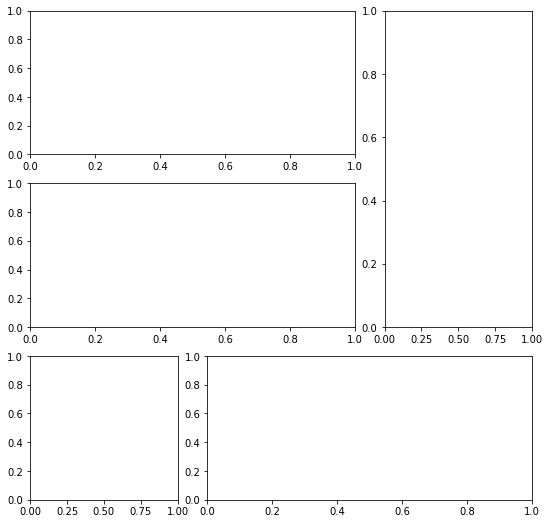

In [5]:
gs = plt.GridSpec(3,3)
fig = plt.figure(figsize=(9,9))
s1=fig.add_subplot(gs[0,:2])
fig.add_subplot(gs[1,:2])
fig.add_subplot(gs[2,0])
fig.add_subplot(gs[:2,2])
fig.add_subplot(gs[2,1:])
plt.show()

##### plt.subplots
fig，ax = subplots(nrows,ncols,sharex,sharey,squeeze,subplot_kw,gridspec_kw,**fig_kw)  创建画布和子图  
1. nrows和ncols
    * 表示将画布分割成几行几列 例：nrows = 2,ncols = 2表示将画布分割为2行2列，并起始值都为0，当调用画布中的坐标轴时，ax[0,0]表示调用坐上角的，ax[1,1]表示调用右下角的；
2. sharex和sharey
    * 表示坐标轴的属性是否相同，可选的参数：True，False，row，col，默认值均为False，表示画布中的四个ax是相互独立的；
    * 当sharex = True, sharey = True时，生成的四个ax的所有坐标轴用有相同的属性;
3. squeeze  bool
    * 默认参数为True：额外的维度从返回的Axes(轴)对象中挤出，对于N*1或1*N个子图，返回一个1维数组，对于N*M，N>1和M>1返回一个2维数组。
    * 为False，不进行挤压操作：返回一个元素为Axes实例的2维数组，即使它最终是1x1。
4. subplot_kw:字典类型，可选参数。把字典的关键字传递给add_subplot()来创建每个子图。
5. gridspec_kw:字典类型，可选参数。把字典的关键字传递给GridSpec构造函数创建子图放在网格里(grid)。
6. **fig_kw：把所有详细的关键字参数传给figure()函数。figsize=(10, 7) 
***
##### plt.subplot
subplot(*args,**kwargs)  函数描述，在指定的位置绘图  
subplot(2,3,3)，将画布分成2行3列在第3个子图中绘制，这里行优先；  
***
__总结：subpot在画布中绘图时，每次都要调用subplot指定位置，subplots()可以一次生成多个，在调用时只需要调用生成对象的ax即可；__

In [6]:
a = np.arange(10)
b = a*2
c = a**2

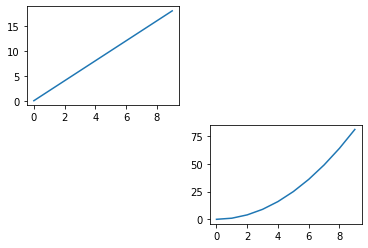

In [7]:
plt.subplot(2,2,1)
plt.plot(a,b)
plt.subplot(2,2,4)
plt.plot(a,c)

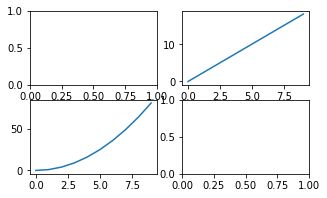

In [8]:
fig, ax = plt.subplots(2,2,figsize=(5,3))
ax[0,1].plot(a,b)
ax[1,0].plot(a,c)

[Text(0, 0, 'one'),
 Text(0, 0, 'two'),
 Text(0, 0, 'three'),
 Text(0, 0, 'four'),
 Text(0, 0, 'five')]

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

Text(0.5, 1.0, 'My first matplotlib plot')

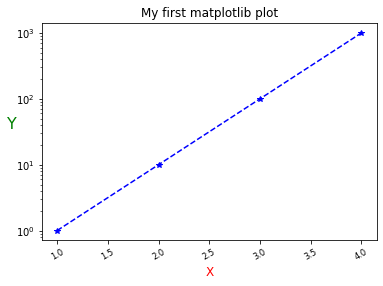

In [9]:
fig, ax = plt.subplots()
# fig = plt.figure(figsize=(5,5))
# ax=fig.add_subplot(211)
# 更改x轴刻度(set_xticks)
ax.set_xticks([0, 1, 2, 3, 4])
# 更改x轴刻度标签角度(rotation设置倾斜角度)
ax.set_xticklabels(['one', 'two', 'three', 'four','five'], rotation=30, fontsize='small')
# 也可以将坐标轴刻度用文字来表示，至于要再加入一个列表即可。此时会在第一个列表中进行坐标轴刻度划分，在第二个列表中找到所需要表达的文字。
# plt.yticks([1,4,9,16,25],[r'one', r'two', r'three', r'four',r'five']) # 注意函数的不同
# 设置x轴标签(set_xlabel)
ax.set_xlabel('X',color='r',fontsize=12)
plt.ylabel("Y", color='g',fontsize=16, rotation=0)
# 设置标题
ax.set_title('My first matplotlib plot')
# Matplotlib 还可以设置非线形刻度，例如对数刻度或者 logit 刻度等等。在 pyplot 中，通过 xscale 和 yscale 两个函数来进行设置。
plt.xscale("linear")
plt.yscale("log")
plt.rcParams['xtick.direction'] = 'inout'# 刻度向内，默认向外为"in"
plt.plot([1,2,3,4],[1,10,100,1000],'--b*')

## 刻度修改

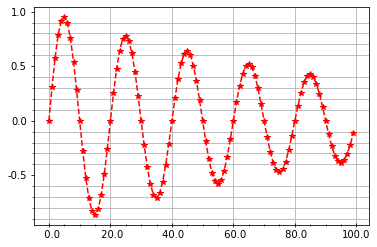

In [10]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
ax = plt.subplot(111)  # 注意:一般都在ax中设置,不再plot中设置
t = np.arange(0.0, 100.0, 1)
s = np.sin(0.1 * np.pi * t) * np.exp(-t * 0.01)
plt.plot(t, s, '--r*')
# 修改主刻度
xmajorLocator = MultipleLocator(20)  # 将x主刻度标签设置为20的倍数
xmajorFormatter = FormatStrFormatter('%5.1f')  # 设置x轴标签文本的格式
ymajorLocator = MultipleLocator(0.5)  # 将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f')  # 设置y轴标签文本的格式
# 设置主刻度标签的位置,标签文本的格式
ax.xaxis.set_major_locator(xmajorLocator)
ax.xaxis.set_major_formatter(xmajorFormatter)
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)
# 修改次刻度
xminorLocator = MultipleLocator(5)  # 将x轴次刻度标签设置为5的倍数
yminorLocator = MultipleLocator(0.1)  # 将此y轴次刻度标签设置为0.1的倍数
# 设置次刻度标签的位置,没有标签文本格式
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
# 打开网格
ax.xaxis.grid(True, which='major')  # x坐标轴的网格使用主刻度
ax.yaxis.grid(True, which='minor')  # y坐标轴的网格使用次刻度
# 设置刻度朝向(in, out, inout)
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.direction'] = 'out'
# 删除坐标轴的刻度显示
# ax.yaxis.set_major_locator(plt.NullLocator())
# ax.xaxis.set_major_formatter(plt.NullFormatter())

## plt.rcParams


Text(0.5, 1.0, 'sin曲线')

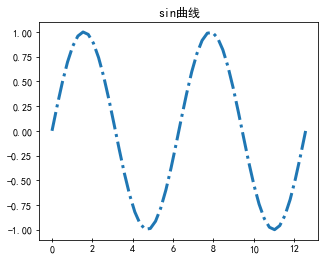

In [11]:
# from matplotlib.colors import ListedColormap
%matplotlib inline    
# 生成数据
x = np.linspace(0, 4*np.pi)
y = np.sin(x)
plt.rcParams['figure.figsize'] = (5.0, 4.0)     # 显示图像的最大范围
plt.rcParams['image.interpolation'] = 'nearest' # 差值方式，设置 interpolation style
plt.rcParams['image.cmap'] = 'gray'             # 灰度空间
#设置rc参数显示中文标题
#设置字体为SimHei显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
#设置正常显示字符
plt.rcParams['axes.unicode_minus'] = False
plt.title('sin曲线')
#设置线条样式
plt.rcParams['lines.linestyle'] = '-.'
# 这两个有点问题
# plt.rcParams['text.color'] = 'green'
# plt.rcParams['lines.color'] = 'green'
#设置线条宽度
plt.rcParams['lines.linewidth'] = 3
#绘制sin曲线
plt.plot(x, y, label='$sin(x)$')
# plt.plot(x, y, label='sin(x)')

In [12]:
# Fixing random state for reproducibility
np.random.seed(19680801)
 
dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2
s3 = np.sin(2 * np.pi * 10 * t) + nse1
s4 = np.sin(2 * np.pi * 10 * t) + nse2
 
fig= plt.figure(1)  # 创建图表1
# axs0=plt.subplot(221,axisbg='#FFDAB9')  #在图标1中创建子图 # 'AxesSubplot' object has no property 'axisbg'
# axs0.plot(t, s1)  #横轴与纵轴数据
# axs0.set_xlim(0, 2)  #限制x轴的取值范围
# axs1=plt.subplot(222,axisbg='#7FFF00')
# axs1.plot(t, s2)
# axs1.set_xlim(0, 2)
# axs2=plt.subplot(223,axisbg='#FF7F50')
# axs2.plot(t, s3)
# axs2.set_xlim(0, 2)
# axs3=plt.subplot(224,axisbg='#A9A9A9')
# axs3.plot(t, s4)
# axs3.set_xlim(0, 2)


<Figure size 360x288 with 0 Axes>

## 日期处理
在我们处理数据的过程中，有可能会碰到时间数据，比如横轴是时间，纵轴是随着时间变化的数据。由于我们获取到的时间数据多种多样，可能是这样的字符串 "2018-03-02"，也可能是 "2018/03/02"，也可能通过 pandas 导入后就已经是 datetime 的格式。那我们需要通过 Matplotlib 绘图的话，我们需要先将日期格式化为 datetime 对象。

* 设置坐标轴名称
    在 pyplot 中，通过xlabel 和 ylabel 两个函数来设置坐标轴名称。
* 设置字体大小和颜色
    通过 fontsize 和 color 属性来设置字体大小和颜色

plt.bar(x, height, width=0.8, bottom=None, , align='center', data=None, kwargs*)

参数|说明|类型
:---:|:---:|:---:
x|x坐标|int,float
height|条形的高度|int,float
width|宽度|0~1，默认0.8
botton|条形的起始位置|也是y轴的起始坐标
align|条形的中心位置|“center”,"lege"边缘
color|条形的颜色|“r","b","g","#123465"，默认“b"
edgecolor|边框的颜色|同上
linewidth|边框的宽度|像素，默认无，int
tick_label|下标的标签|可以是元组类型的字符组合
log|y轴使用科学计算法表示|bool
orientatio|n是竖直条还是水平条|竖直："vertical"，水平条："horizontal"

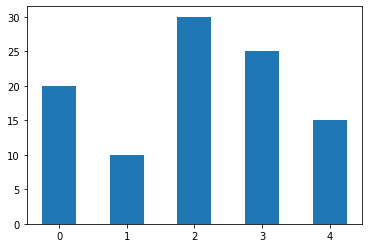

In [5]:
# 数据
N = 5
y = [20, 10, 30, 25, 15]
x = np.arange(N)

# 绘图 x x轴， height 高度, 默认：color="blue", width=0.8
p1 = plt.bar(x, height=y, width=0.5, )

### 给子图添加colorbar（颜色条或渐变色条）
* plt.Figure.colorbar(self, mappable, cax=None, ax=None, use_gridspec=True, **kw)
* 用法
    * colorbar(**kwargs)
    * colorbar(mappable, **kwargs)
    * colorbar(mappable, cax=cax, **kwargs)
    * colorbar(mappable, ax=ax, **kwargs)
---
其中第一种用在没有子图的时候，也就是plt.colorbar()可以不用输入参数
后面三个一般用在有子图的时候，其中上面的例子中第8行就是用的这里第4种用法，这里有一个必须的参数mappable  
参数mappable理解起来就是我们需要提供一个可以映射颜色的对象，这个对象就是我们作的图  
所以例子中6、7行我们需要获取这两个子图对象，然后将其传给colorbar()，colorbar则会获取这个图所用的渐变颜色种类，之后的一个参数ax用来指示colorbar()获取到的渐变色条在哪里显示，我们设置ax=ax[0]那它就在ax[0]的区域显示，我们也可以改变渐变色条出现的位置，请对比下面和上面的区别： 

___shrink表示整体收缩比例，aspect仅对bar的宽度有影响，aspect值越大，bar越窄___


In [ ]:
fig, ax = plt.subplots(2,1)
ax = ax.flatten()
x = np.random.rand(10000)
y = np.random.rand(10000)
ax0 = ax[0].scatter(x,y,c=x,cmap="Reds")
ax1 = ax[1].scatter(x,y,c=x,cmap="Blues")
fig.colorbar(ax0, ax=ax[0])
fig.colorbar(ax1, ax=ax[1])

我们还可以给ax参数设置成多个Axes对象，这样一个色条就可以包括多个子图

In [ ]:
fig, ax = plt.subplots(3,1)
ax = ax.flatten()
x = np.random.rand(10000)
y = np.random.rand(10000)
ax0 = ax[0].scatter(x,y,c=x,cmap="Reds")
ax1 = ax[1].scatter(x,y,c=x,cmap="Blues")
ax2 = ax[2].scatter(x,y,c=x,cmap="Blues")
fig.colorbar(ax0, ax=ax[0])
fig.colorbar(ax1, ax=[ax[1],ax[2]], shrink=0.6, aspect=20)
# shrink表示整体收缩比例，aspect仅对bar的宽度有影响，aspect值越大，bar越窄




* 设置坐标轴名称
    在 pyplot 中，通过xlabel 和 ylabel 两个函数来设置坐标轴名称。
* 设置字体大小和颜色
    通过 fontsize 和 color 属性来设置字体大小和颜色

plt.bar(x, height, width=0.8, bottom=None, , align='center', data=None, kwargs*)

参数|说明|类型
:---:|:---:|:---:
x|x坐标|int,float
height|条形的高度|int,float
width|宽度|0~1，默认0.8
botton|条形的起始位置|也是y轴的起始坐标
align|条形的中心位置|“center”,"lege"边缘
color|条形的颜色|“r","b","g","#123465"，默认“b"
edgecolor|边框的颜色|同上
linewidth|边框的宽度|像素，默认无，int
tick_label|下标的标签|可以是元组类型的字符组合
log|y轴使用科学计算法表示|bool
orientatio|n是竖直条还是水平条|竖直："vertical"，水平条："horizontal"

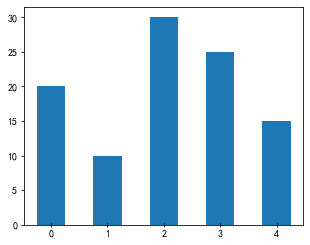

In [21]:
# 数据
N = 5
y = [20, 10, 30, 25, 15]
x = np.arange(N)

# 绘图 x x轴， height 高度, 默认：color="blue", width=0.8
p1 = plt.bar(x, height=y, width=0.5, )

### 给子图添加colorbar（颜色条或渐变色条）
* plt.Figure.colorbar(self, mappable, cax=None, ax=None, use_gridspec=True, **kw)
* 用法
    * colorbar(**kwargs)
    * colorbar(mappable, **kwargs)
    * colorbar(mappable, cax=cax, **kwargs)
    * colorbar(mappable, ax=ax, **kwargs)
---
其中第一种用在没有子图的时候，也就是plt.colorbar()可以不用输入参数
后面三个一般用在有子图的时候，其中上面的例子中第8行就是用的这里第4种用法，这里有一个必须的参数mappable  
参数mappable理解起来就是我们需要提供一个可以映射颜色的对象，这个对象就是我们作的图  
所以例子中6、7行我们需要获取这两个子图对象，然后将其传给colorbar()，colorbar则会获取这个图所用的渐变颜色种类，之后的一个参数ax用来指示colorbar()获取到的渐变色条在哪里显示，我们设置ax=ax[0]那它就在ax[0]的区域显示，我们也可以改变渐变色条出现的位置，请对比下面和上面的区别： 

___shrink表示整体收缩比例，aspect仅对bar的宽度有影响，aspect值越大，bar越窄___


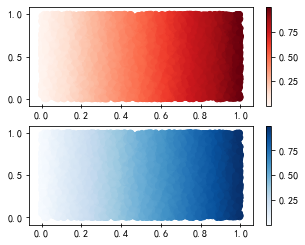

In [22]:
fig, ax = plt.subplots(2,1)
ax = ax.flatten()
x = np.random.rand(10000)
y = np.random.rand(10000)
ax0 = ax[0].scatter(x,y,c=x,cmap="Reds")
ax1 = ax[1].scatter(x,y,c=x,cmap="Blues")
fig.colorbar(ax0, ax=ax[0])
fig.colorbar(ax1, ax=ax[1])

我们还可以给ax参数设置成多个Axes对象，这样一个色条就可以包括多个子图

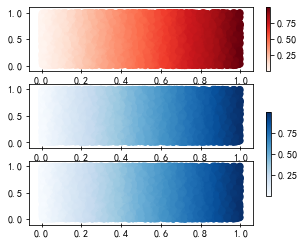

In [23]:
fig, ax = plt.subplots(3,1)
ax = ax.flatten()
x = np.random.rand(10000)
y = np.random.rand(10000)
ax0 = ax[0].scatter(x,y,c=x,cmap="Reds")
ax1 = ax[1].scatter(x,y,c=x,cmap="Blues")
ax2 = ax[2].scatter(x,y,c=x,cmap="Blues")
fig.colorbar(ax0, ax=ax[0])
fig.colorbar(ax1, ax=[ax[1],ax[2]], shrink=0.6, aspect=20)
# shrink表示整体收缩比例，aspect仅对bar的宽度有影响，aspect值越大，bar越窄


# 散点图

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

* x/y ：数据  
    都是向量，而且必须长度相等。

* s ：标记大小  
    以平方磅为单位的标记面积，指定为下列形式之一：

    数值标量 ： 以相同的大小绘制所有标记。
    行或列向量 ： 使每个标记具有不同的大小。x、y 和 sz 中的相应元素确定每个标记的位置和面积。sz 的长度必须等于 x 和 y 的长度。  
    \[\] ： 使用 36 平方磅的默认面积。  
    
* c：标记颜色(color)  
    标记颜色，指定为下列形式之一：  
    RGB 三元数或颜色名称 - 使用相同的颜色绘制所有标记。  
    由 RGB 三元数组成的三列矩阵 - 对每个标记使用不同的颜色。矩阵的每行为对应标记指定一种 RGB 三元数颜色。行数必须等于 x 和 y 的长度。
    向量 - 对每个标记使用不同的颜色，并以线性方式将 c 中的值映射到当前颜色图中的颜色。c 的长度必须等于 x 和 y 的长度。要更改坐标区的颜色图，请使用 colormap 函数。
    如果散点图中有三个点，并且您希望这些颜色成为颜色图的索引，请以三元素列向量的形式指定 c。

选项|说明|对应的RGB三元数
:---:|:---:|:---:
'red'或'r'|红色|[1 0 0]
'green'或'g'|绿色|[0 1 0]
'blue'或'b'|蓝色|[0 0 1]
'yellow'或'y'|黄色|[1 1 0]
'magenta'或 'm'|品红色|[1 0 1]
'cyan'或'c'|青蓝色|[0 1 1]
'white'或'w'|白色|[1 1 1]
'black'或'k'|黑色|[0 0 0]

***
* marker：标记样式  

值|说明
:---:|:---:
'o'|圆圈
'+'|加号
'*'|星号
'.'|点
'x'|叉号
'square'或's'|方形
'diamond'或 'd'|菱形
'^'|上三角
'v'|下三角
'>'|右三角
'<'|左三角
'pentagram'或'p'|五角星（五角形）
'hexagram'或'h'|六角星（六角形）
'none'|无标记

***

* edgecolors：轮廓颜色    
    和c类似，参数也相同  
* alpha：透明度  
    \[0,1\]：1不透明，0透明  

* cmap：色彩盘  
    可以使用默认的也可以使用自定义的，它实际上就是一个 三列的矩阵(或者说，shape 为 [N, 3]的 array )  
    矩阵中的值 取值范围 为 \[0.,1.\]  
    每一行代表一个颜色 (RGB)  
* linewidths：线宽  
    标记边缘的宽度，默认是’face’  
* 注意事项：  
    color、marker等不能同时作为一个参数，plt.scatter(x1, y1, ‘bo’, s=5)不合法。


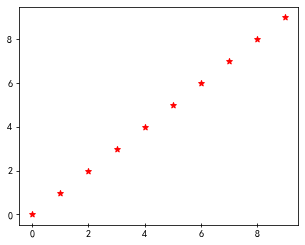

In [45]:
x = np.arange(10)
y1 = x
y2 = 2*x
plt.scatter(x,y1,color='r',marker='*',s=36)

[ref1](https://www.jianshu.com/p/53e49c02c469)

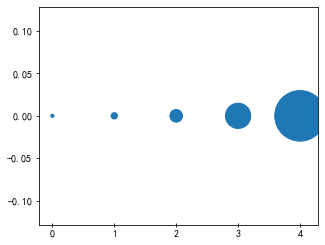

In [33]:
x = [0,1,2,3,4]
y = [0]*len(x)
s = [10*4**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()

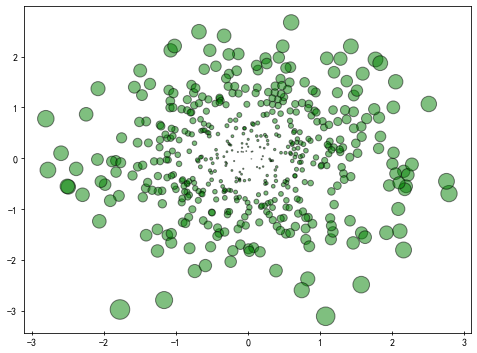

In [37]:
fig = plt.figure(figsize=(8, 6))
#Generating a Gaussion dataset:
#creating random vectors from the multivariate normal distribution
#given mean and covariance
mu_vec1 = np.array([0, 0])
cov_mat1 = np.array([[1, 0], [0, 1]])
X = np.random.multivariate_normal(mu_vec1, cov_mat1, 500)
R = X**2
R_sum = R.sum(axis=1)
plt.scatter(X[:, 0],
            X[:, 1],
            color='green',
            marker='o',
            s=32. * R_sum,
            edgecolor='black',
            alpha=0.5)

# 线

# 柱状图

# 玫瑰图

<BarContainer object of 1 artists>

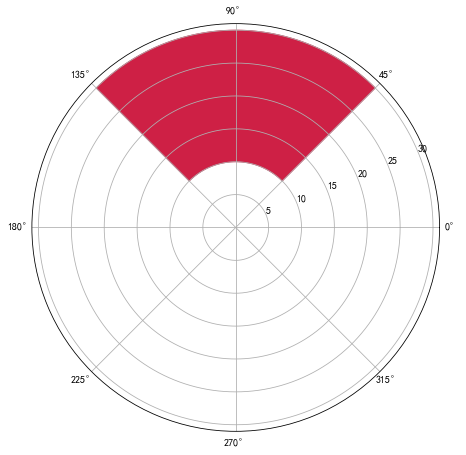

In [24]:
y=20

x=np.pi/2

w=np.pi/2

color=(206/255,32/255,69/255)

edgecolor=(206/255,32/255,69/255)

fig=plt.figure(figsize=(13.44,7.5))#建立一个画布

ax=fig.add_subplot(111,projection='polar')#建立一个坐标系，projection='polar'表示极坐标

ax.bar(x,y,width=w,bottom=10,color=color,edgecolor=color)

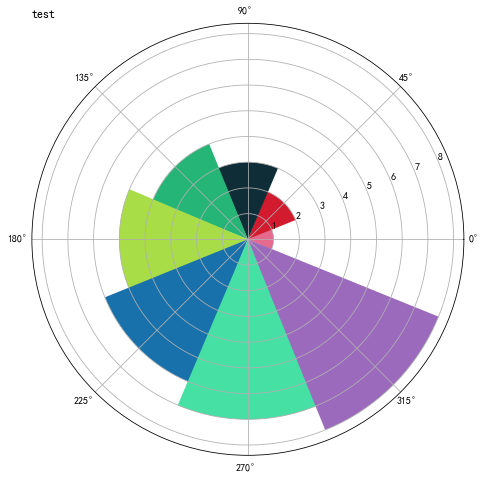

In [25]:
def show_rose(values,title):
    #玫瑰花瓣的个数为8，45度
    n = 8
    angle = np.arange(0,2*np.pi,2*np.pi/n)
    #绘制的数据
    radius = np.array(values)
    #极坐标条形图，polar为True
    plt.axes([0,0,1.5,1.5],polar = True)
    
    color = np.random.random(size = 24).reshape((8,3))
    
    plt.bar(angle,radius,color = color)
    
    plt.title(title,loc = 'left')
v = [1,2,3,4,5,6,7,8]
show_rose(v,'test')

[如何用matplotlib绘制二维数学向量？](http://cn.voidcc.com/question/p-crxlqxsi-yk.html)

<Figure size 432x288 with 0 Axes>

(-1, 10)

(-1, 10)

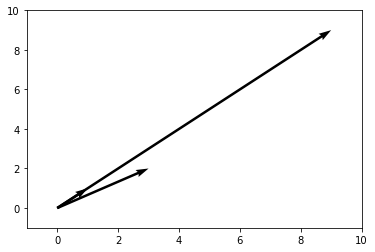

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

soa = np.array([[0, 0, 3, 2], [0, 0, 1, 1], [0, 0, 9, 9]]) 
X, Y, U, V = zip(*soa) 
plt.figure() 
ax = plt.gca() 
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1) 
ax.set_xlim([-1, 10]) 
ax.set_ylim([-1, 10]) 
plt.draw() 
plt.show() 

In [10]:
a=np.array([[1,2],[2,3],[3,1]])
a

array([[1, 2],
       [2, 3],
       [3, 1]])

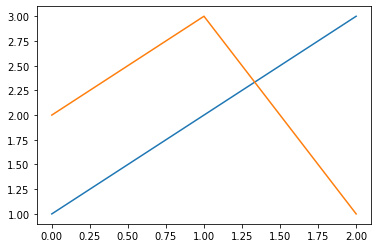

In [11]:
plt.plot(a)

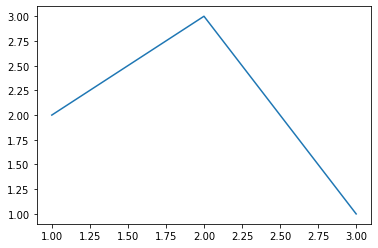

In [12]:
plt.plot(a[:,0],a[:,1])

array([[0, 0],
       [0, 0],
       [0, 0]])

array([[1, 2],
       [2, 3],
       [3, 1]])

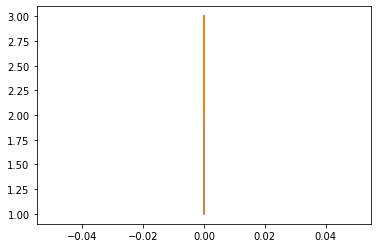

In [23]:
x = np.zeros_like(a)
x
a
plt.plot(x,a)

In [2]:
help(plt.text)

Help on function text in module matplotlib.pyplot:

text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : scalars
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dictionary, optional, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by your rc parameters.
    
    withdash : boolean, optional, default: False
        Creates a `~matplotlib.text.TextWithDash` instance instead of a
        `~matplotlib.text.Text` instance.
    
    Returns
    -------
    text : `.Text`
        The created `.Text` instance.
    
    Other Parameters
    ----------------
    **kwargs : 